In [4]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

In [7]:

import os
# change python directory to /home/gmh4/projects/CompLab/comp-lab-class
os.chdir('/home/yx2892/comp-lab-class/Week2/Analysis/')

# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('/home/yx2892/comp-lab-class/Week2/Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='/home/yx2892/comp-lab-class/Week2/Data/1hz3_T310.start.nowater.gro')

dist [2.4080002 2.294153  2.4405324 2.3514538 2.8238873 3.389765  2.9046328
 2.9567354 3.0590065 4.125036  3.451251  3.3695395 2.1477714 2.0729964
 2.562689  2.211393  2.233543 ] rg [0.85057444 1.00091706 1.00509146 0.9700538  1.03096215 1.08965024
 1.06154491 1.01728751 1.0467843  1.25890696 1.03388204 1.18969875
 1.03686539 1.03002704 1.00622438 1.02566947 1.03948413]


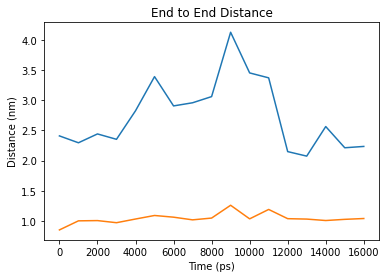

In [11]:

# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)
rg=md.compute_rg(traj)
print('dist',dist,'rg',rg)

#plot distance vs time
plt.plot(traj.time,dist,label='dist')
plt.plot(traj.time,rg,label='rg')
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.title('End to End Distance')
plt.show()




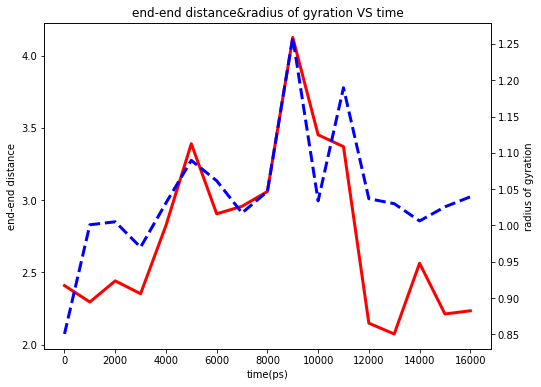

In [31]:
x_a = traj.time
y_a1 = dist
y_a2 = rg
fig = plt.figure(num=3,figsize=(8,6),facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(x_a, y_a1,'r',linewidth=3,linestyle='solid')
ax1.set_ylabel('end-end distance')
ax1.set_title("end-end distance&radius of gyration VS time")
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_a, y_a2, 'b',linewidth=3,linestyle='dashed')#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('radius of gyration')
ax1.set_xlabel('time(ps)')
plt.show()

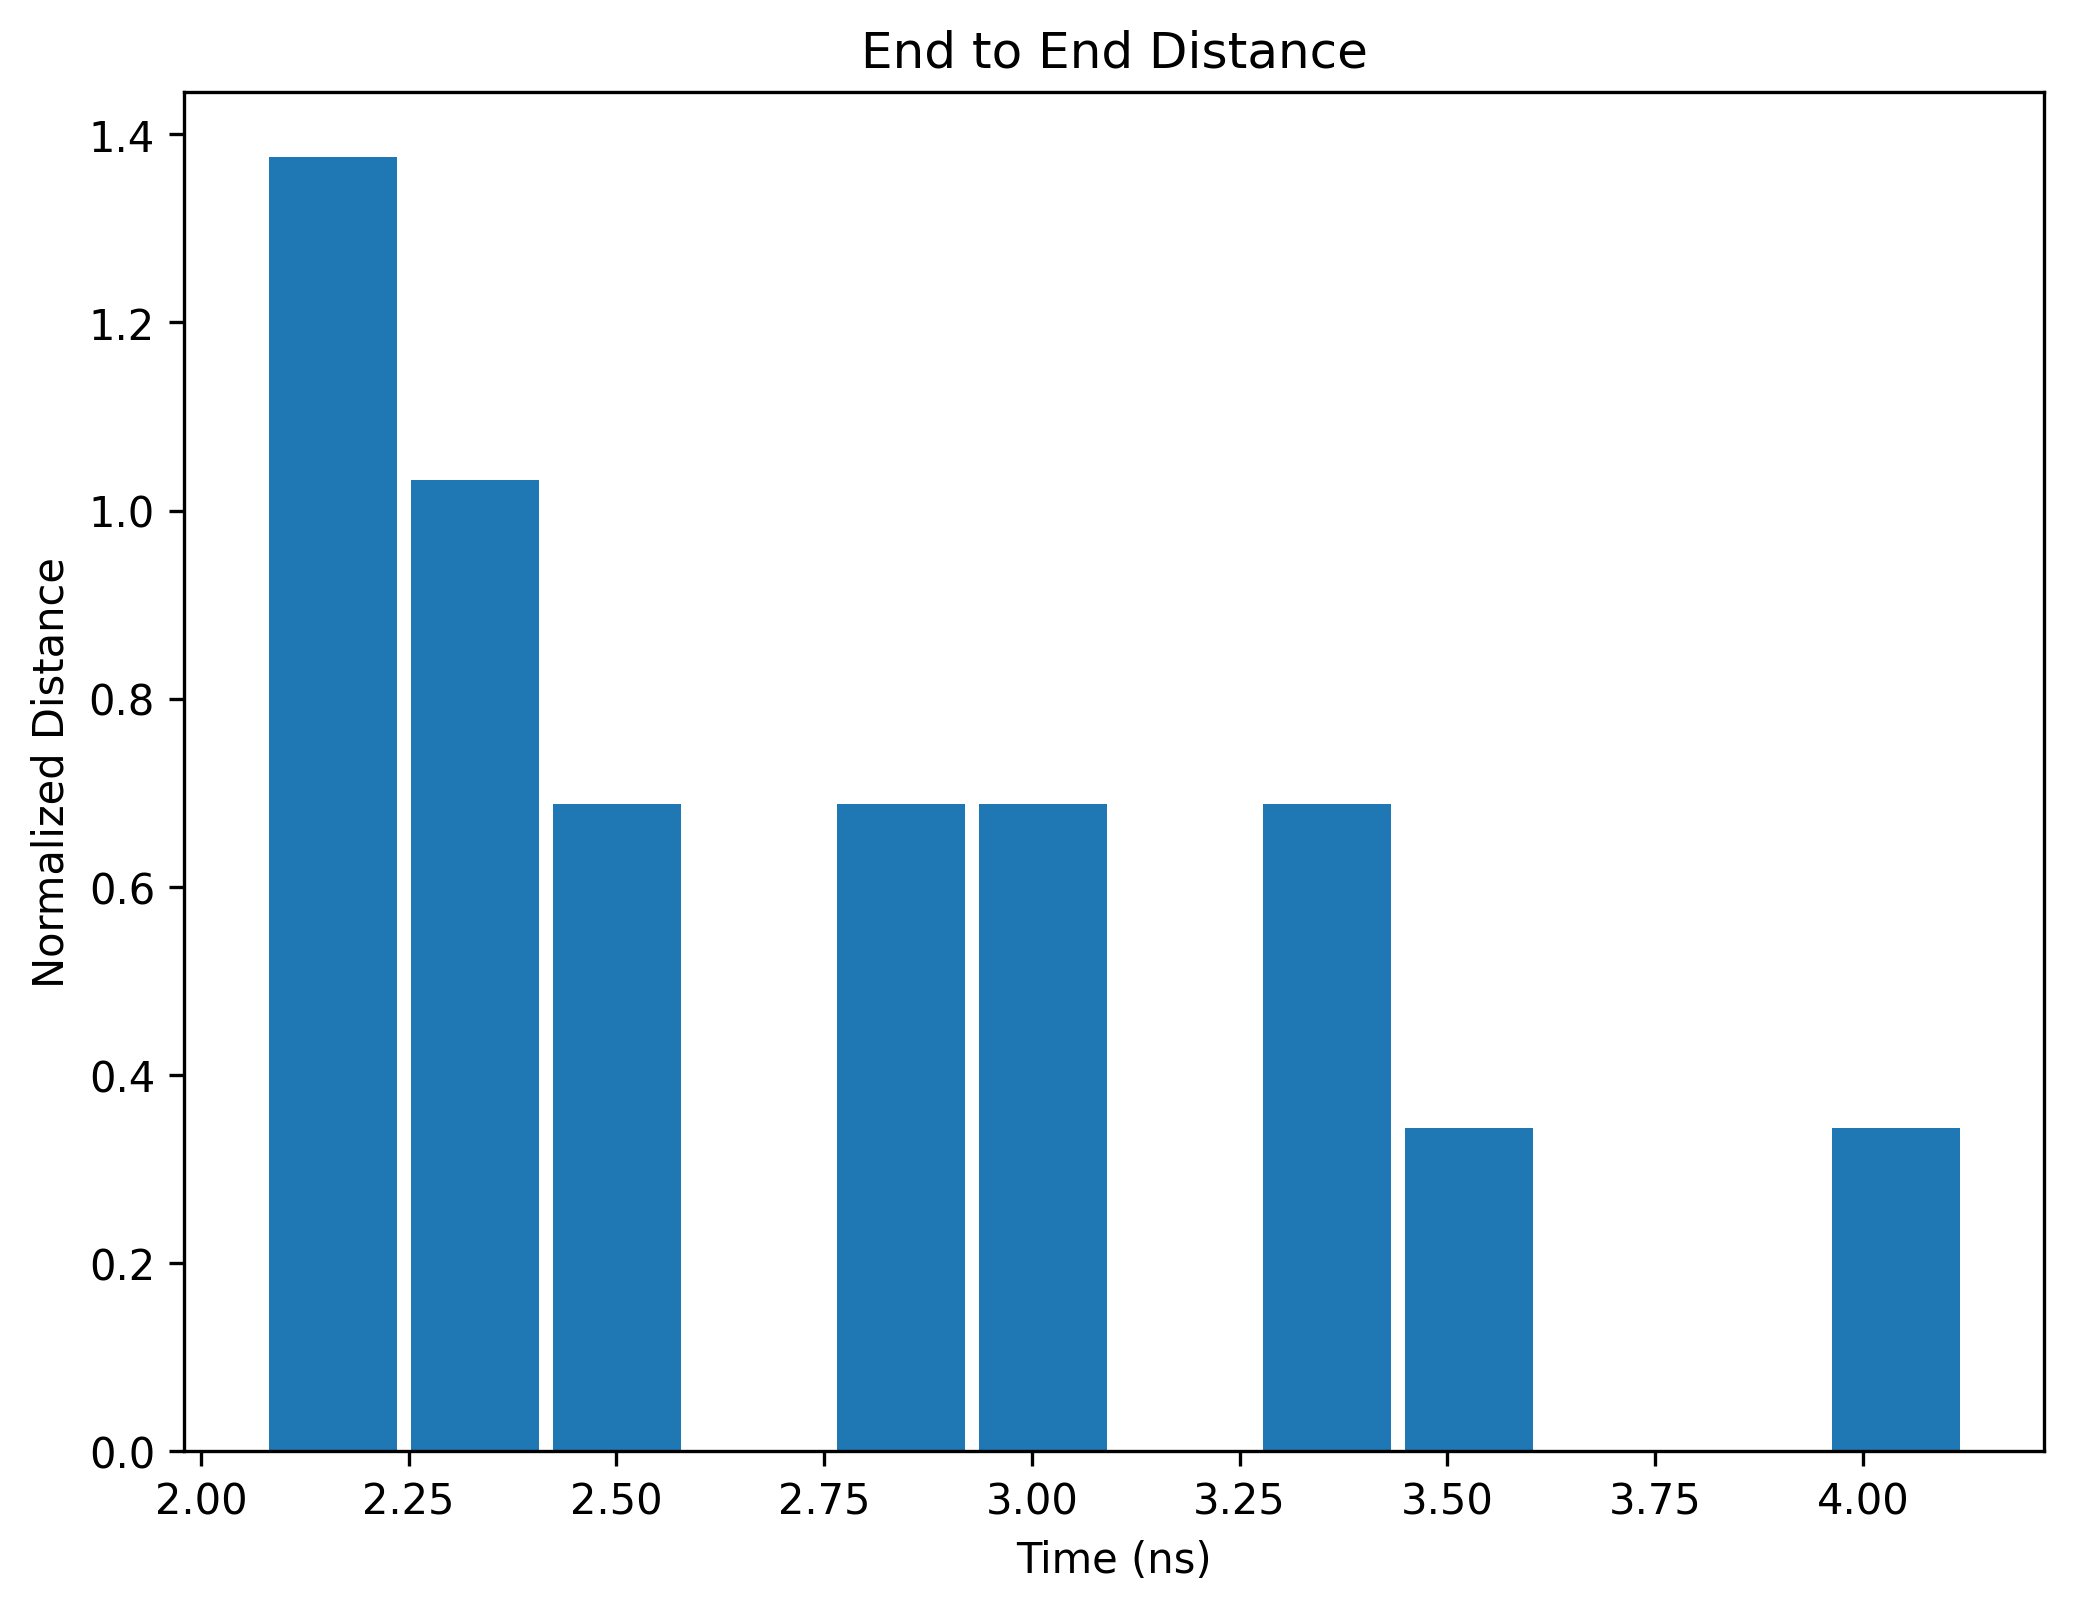

In [22]:
# make this plot look nice


def MaxMinNormalization(x):
    Min=min(x)
    Max=max(x)
    x = x / Max ;
    return x;

time_name = []
for i in range(0,len(traj.time)):
    if i % 2 == 0:
        time_name.append(int(traj.time[i]))
    else:
        time_name.append('')


plt.figure(figsize = (8,6),dpi=300)
#plt.bar(range(len(dist)),dist,tick_label = time_name, width =0.1, color='red', alpha=0.5, label='x')
#plt.bar(range(len(dist)),MaxMinNormalization(dist), width =0.1, color='blue', alpha=0.5, label='y')
plt.hist(dist,label="Normalized Distance", bins=12, rwidth=0.9, density=True)
#plt.hist(MaxMinNormalization(dist), bins=200, color='blue', alpha=0.5, label='y')
#plt.hist(traj.time, MaxMinNormalization(dist))
#plt.hist(traj.time,MaxMinNormalization(rg))
plt.xlabel('Time (ns)')
plt.ylabel('Normalized Distance')
plt.title('End to End Distance')
plt.show()

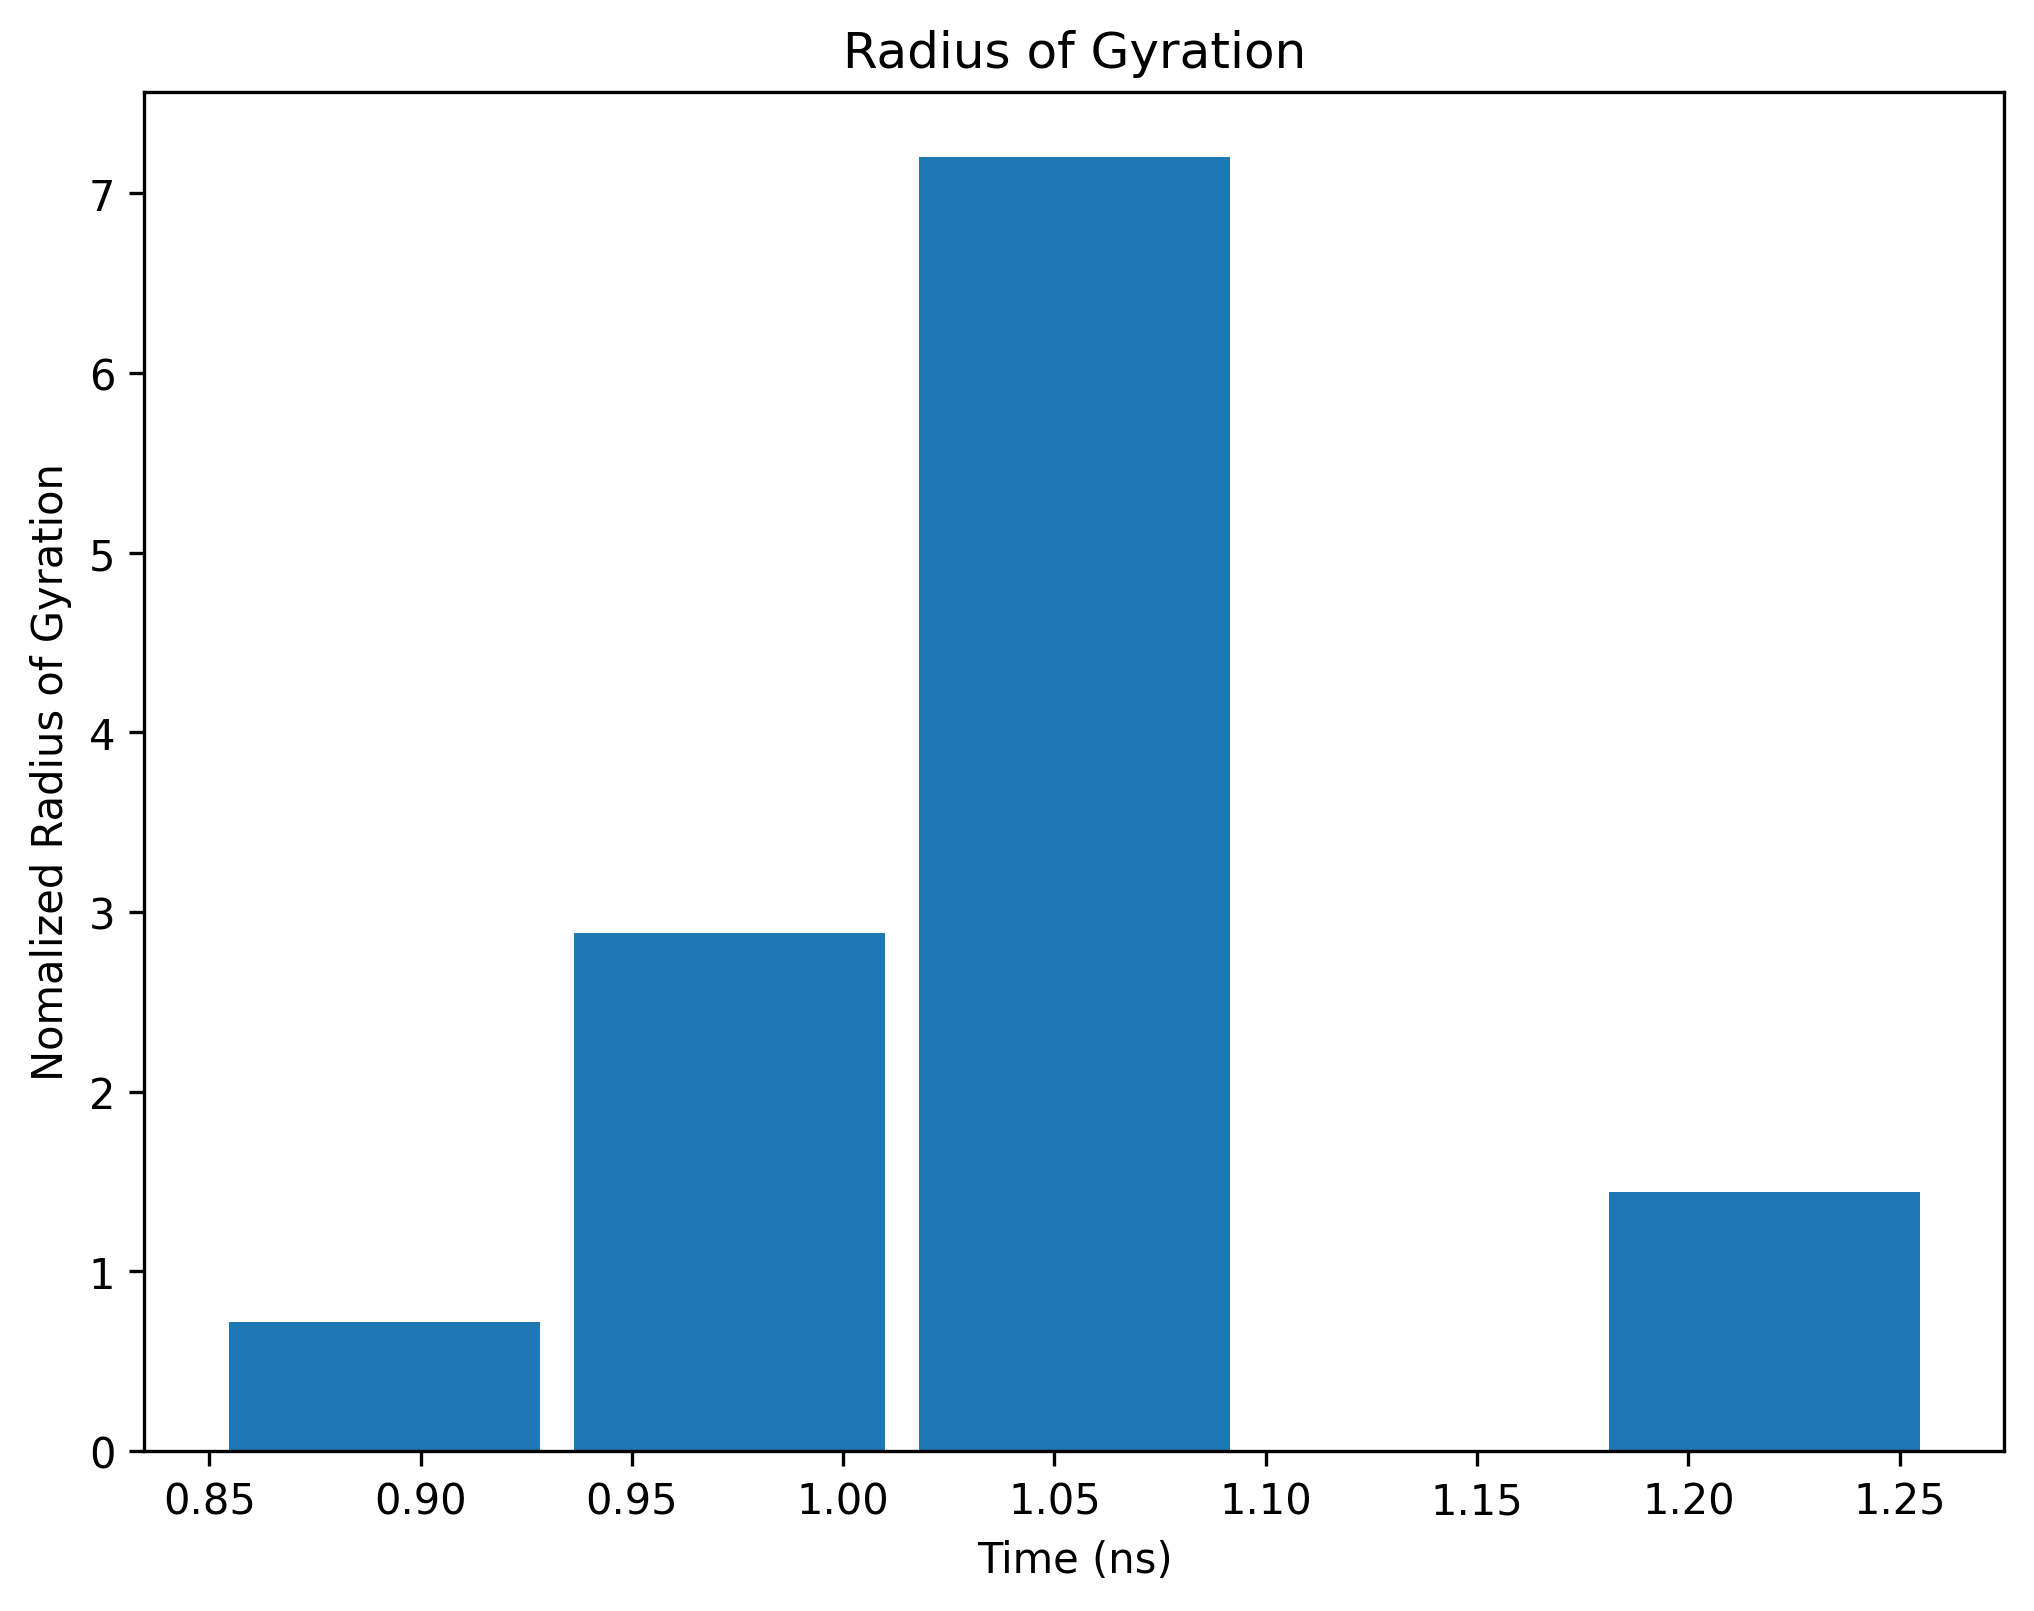

In [23]:
plt.figure(figsize = (8,6),dpi=300)
#plt.bar(range(len(dist)),dist,tick_label = time_name, width =0.1, color='red', alpha=0.5, label='x')
#plt.bar(range(len(dist)),MaxMinNormalization(dist), width =0.1, color='blue', alpha=0.5, label='y')
plt.hist(rg,label="Nomalized Radius of Gyration", bins=5, rwidth=0.9, density=True)
#plt.hist(MaxMinNormalization(dist), bins=200, color='blue', alpha=0.5, label='y')
#plt.hist(traj.time, MaxMinNormalization(dist))
#plt.hist(traj.time,MaxMinNormalization(rg))
plt.xlabel('Time (ns)')
plt.ylabel('Nomalized Radius of Gyration')
plt.title('Radius of Gyration')
plt.show()

In [26]:
dist

array([2.4080002, 2.294153 , 2.4405324, 2.3514538, 2.8238873, 3.389765 ,
       2.9046328, 2.9567354, 3.0590065, 4.125036 , 3.451251 , 3.3695395,
       2.1477714, 2.0729964, 2.562689 , 2.211393 , 2.233543 ],
      dtype=float32)

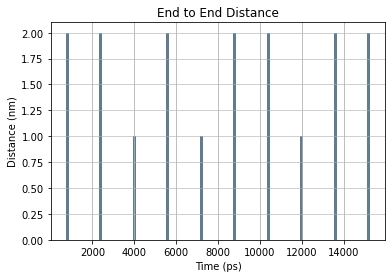